In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hanifalirsyad","key":"de62fbe3f4d3d8a629805db0a52df53c"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

 92% 202M/219M [00:02<00:00, 141MB/s]
100% 219M/219M [00:03<00:00, 75.7MB/s]


In [5]:
import zipfile

zip_ref = zipfile.ZipFile("/content/rice-image-dataset.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [31]:
def list_files(path):
  files_num = 0
  for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * (level)
    files_num += len(files)
    print('{}{}/ {}'.format(indent, os.path.basename(root), (str(len(files)) + ' images' if len(files) > 0 else '')))
  
  return files_num

In [33]:
import os
data_dir = '/content/Rice_Image_Dataset'
list_files(data_dir)

Rice_Image_Dataset/ 
  Ipsala/ 15000 images
  Basmati/ 15000 images
  Jasmine/ 15000 images
  Karacadag/ 15000 images
  .ipynb_checkpoints/ 
  Arborio/ 15000 images


75000

In [34]:
def read_files(path):
  image_files = []
  for dirname, dirnames, filenames in os.walk(path):
    for filename in filenames:
      image_files.append(os.path.join(dirname, filename))
  
  return image_files

In [36]:
import PIL

full_directory = read_files(data_dir)
image_sizes = []
for file in full_directory:
  image = PIL.Image.open(file)
  width, height = image.size
  image_sizes.append(f'{width}x{height}')

unique_sizes = set(image_sizes)

print(f'Image size list (first 15 unique size): \n{list(unique_sizes)[:15]}')

Image size list (first 15 unique size): 
['250x250']


In [38]:
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'valid')

In [39]:
arborio_data = os.path.join(data_dir, 'arborio')
basmati_data = os.path.join(data_dir, 'basmati')
ipsala_data = os.path.join(data_dir, 'ipsala')
jasmine_data = os.path.join(data_dir, 'jasmine')
karacadag_data = os.path.join(data_dir, 'karacadag')

In [40]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [41]:
arborio_train = os.path.join(train_dir, 'arborio')
basmati_train = os.path.join(train_dir, 'basmati')
ipsala_train = os.path.join(train_dir, 'ipsala')
jasmine_train = os.path.join(train_dir, 'jasmine')
karacadag_train = os.path.join(train_dir, 'karacadag')

In [42]:
arborio_valid = os.path.join(validation_dir, 'arborio')
basmati_valid = os.path.join(validation_dir, 'basmati')
ipsala_valid = os.path.join(validation_dir, 'ipsala')
jasmine_valid = os.path.join(validation_dir, 'jasmine')
karacadag_valid = os.path.join(validation_dir, 'karacadag')

In [43]:
os.mkdir(arborio_train)
os.mkdir(basmati_train)
os.mkdir(ipsala_train)
os.mkdir(jasmine_train)
os.mkdir(karacadag_train)
os.mkdir(arborio_valid)
os.mkdir(basmati_valid)
os.mkdir(ipsala_valid)
os.mkdir(jasmine_valid)
os.mkdir(karacadag_valid)

In [48]:
from sklearn.model_selection import train_test_split

latih_arborio_dir, val_arborio_dir = train_test_split(os.listdir(arborio_data), test_size=0.20)
latih_basmati_dir, val_basmati_dir = train_test_split(os.listdir(basmati_data), test_size=0.20)
latih_ipsala_dir, val_ipsala_dir = train_test_split(os.listdir(ipsala_data), test_size=0.20)
latih_jasmine_dir, val_jasmine_dir = train_test_split(os.listdir(jasmine_data), test_size=0.20)
latih_karacadag_dir, val_karacadag_dir = train_test_split(os.listdir(karacadag_data), test_size=0.20)

In [50]:
import shutil

for file in latih_arborio_dir:
  shutil.copy(os.path.join(arborio_data, file), os.path.join(arborio_train, file))
for file in latih_basmati_dir:
  shutil.copy(os.path.join(basmati_data, file), os.path.join(basmati_train, file))
for file in latih_ipsala_dir:
  shutil.copy(os.path.join(ipsala_data, file), os.path.join(ipsala_train, file))
for file in latih_jasmine_dir:
  shutil.copy(os.path.join(jasmine_data, file), os.path.join(jasmine_train, file))
for file in latih_karacadag_dir:
  shutil.copy(os.path.join(karacadag_data, file), os.path.join(karacadag_train, file))
for file in val_arborio_dir:
  shutil.copy(os.path.join(arborio_data, file), os.path.join(arborio_valid, file))
for file in val_basmati_dir:
  shutil.copy(os.path.join(basmati_data, file), os.path.join(basmati_valid, file))
for file in val_ipsala_dir:
  shutil.copy(os.path.join(ipsala_data, file), os.path.join(ipsala_valid, file))
for file in val_jasmine_dir:
  shutil.copy(os.path.join(jasmine_data, file), os.path.join(jasmine_valid, file))
for file in val_karacadag_dir:
  shutil.copy(os.path.join(karacadag_data, file), os.path.join(karacadag_valid, file))

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(validation_split=0.25,
                                   rescale=1/.255
                                  )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode = "categorical")
valid_generator = train_datagen.flow_from_directory(validation_dir,
                                                    target_size=(256,256),
                                                    batch_size=32,
                                                    class_mode = "categorical")

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [57]:
class Callbackkuh(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.92) and (logs.get('val_accuracy')>=0.92):
            print("\nReached %2.2f%% accuracy, training has been stop" %(logs.get('accuracy')*100))
            self.model.stop_training = True

callbacks = Callbackkuh()

In [58]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D

In [59]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 123008)            0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [61]:
history = model.fit(
    train_generator,
    steps_per_epoch = 30,
    epochs = 50,
    validation_data = valid_generator,
    validation_steps = 20,
    verbose = 2,
    callbacks = [callbacks]
)


Epoch 1/50
30/30 - 85s - loss: 415.2906 - accuracy: 0.4594 - val_loss: 0.9286 - val_accuracy: 0.6484 - 85s/epoch - 3s/step
Epoch 2/50
30/30 - 76s - loss: 0.6699 - accuracy: 0.7688 - val_loss: 0.4977 - val_accuracy: 0.8219 - 76s/epoch - 3s/step
Epoch 3/50
30/30 - 77s - loss: 0.3920 - accuracy: 0.8531 - val_loss: 0.3668 - val_accuracy: 0.8797 - 77s/epoch - 3s/step
Epoch 4/50
30/30 - 77s - loss: 0.3375 - accuracy: 0.9062 - val_loss: 0.3764 - val_accuracy: 0.8797 - 77s/epoch - 3s/step
Epoch 5/50
30/30 - 77s - loss: 0.3305 - accuracy: 0.8865 - val_loss: 0.2972 - val_accuracy: 0.9156 - 77s/epoch - 3s/step
Epoch 6/50
30/30 - 77s - loss: 0.2538 - accuracy: 0.9104 - val_loss: 0.3381 - val_accuracy: 0.9156 - 77s/epoch - 3s/step
Epoch 7/50

Reached 93.44% accuracy, training has been stop
30/30 - 75s - loss: 0.1892 - accuracy: 0.9344 - val_loss: 0.2053 - val_accuracy: 0.9406 - 75s/epoch - 3s/step


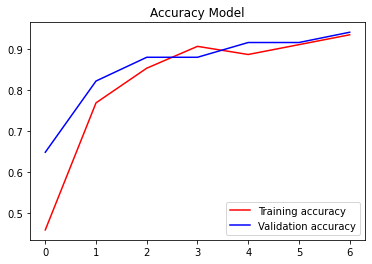

<Figure size 432x288 with 0 Axes>

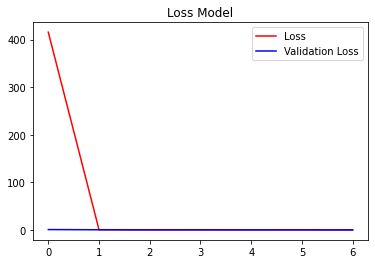

<Figure size 432x288 with 0 Axes>

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy Model')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss Model')
plt.legend(loc=0)
plt.figure()

plt.show()

In [68]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite = converter.convert()

In [69]:
with tf.io.gfile.GFile('model_rice.tflite', 'wb') as f:
  f.write(tflite)